In [1]:
pwd

'/Users/alisarupenyan/Documents/GitHub/alisa-rupenyan.github.io'

# Data generation, exploration, regression, then classification, then clustering, then RL

 * Data generation

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt




In [14]:
import numpy as np
import pandas as pd

# initial dataset
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs':    [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final':   [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for _ in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise with mean=0 and std=0.2
        new_row = row + noise
        # Ensure values are within boundaries (grades must be between 2 and 6)
        new_row = new_row.clip(2, 6)
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)



Augmented Dataset Shape: (160, 3)

Summary Statistics (Final Grades):
count    160.000000
mean       4.479292
std        0.918909
min        2.718507
25%        3.808585
50%        4.432312
75%        5.229416
max        6.000000
Name: Final, dtype: float64


In [ ]:
# Data exploration

# Print dataset shape and summary statistics
print("Augmented Dataset Shape:", df_aug.shape)
print("\nSummary Statistics (Final Grades):")
print(df_aug['Final'].describe())

plt.figure(figsize=(10, 5))

plt.subplot(1, 1, 1)
plt.hist(df_aug['Final']+0.0, bins=20, color='blue', alpha=0.6, edgecolor='black')
plt.title(" SEP Note Distribution")
plt.xlabel("SEP Note")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Labs')

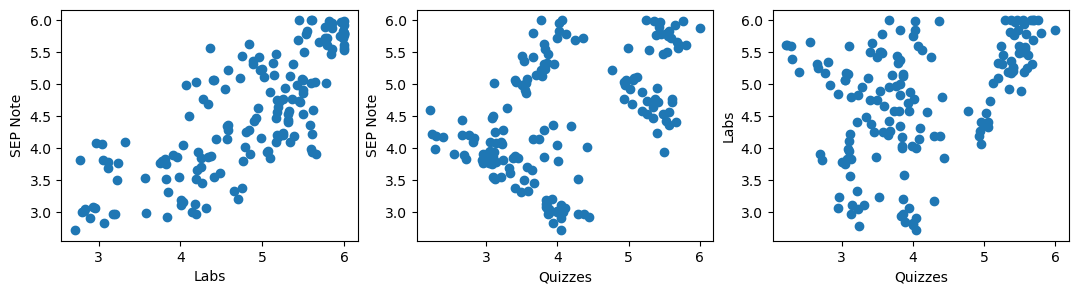

In [15]:
# Exploratory data analysis

plt.figure(figsize=(13, 3))

plt.subplot(1, 3, 1)
plt.plot(df_aug['Labs'],df_aug['Final'],'o')

plt.xlabel("Labs")
plt.ylabel("SEP Note")

plt.subplot(1, 3, 2)
plt.plot(df_aug['Quizzes'],df_aug['Final'],'o')
plt.xlabel("Quizzes")
plt.ylabel("SEP Note")

plt.subplot(1, 3, 3)
plt.plot(df_aug['Quizzes'],df_aug['Labs'],'o')
plt.xlabel("Quizzes")
plt.ylabel("Labs")

Regression Model Evaluation:
Mean Squared Error: 0.3375066273659515
R-squared: 0.5165412033190853


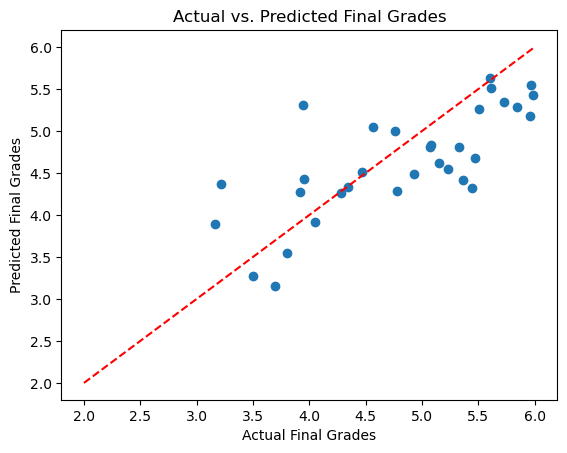

In [11]:
# Features and target for regression
X = df_aug[['Quizzes', 'Labs']]
y = df_aug['Final']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = regressor.predict(X_test)
print("Regression Model Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Visualize Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Grades")
plt.ylabel("Predicted Final Grades")
plt.title("Actual vs. Predicted Final Grades")
plt.plot([2, 6], [2, 6], color='red', linestyle='--')  # reference line
plt.show()

In [12]:
#classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create binary target: 1 for pass, 0 for fail
df_aug['Pass'] = (df_aug['Final'] > 4).astype(int)

X_class = df_aug[['Quizzes', 'Labs']]
y_class = df_aug['Pass']

# Split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_cls, y_train_cls)

# Evaluate the classifier
y_pred_cls = classifier.predict(X_test_cls)
print("\nClassification Model Evaluation:")
print(confusion_matrix(y_test_cls, y_pred_cls))
print(classification_report(y_test_cls, y_pred_cls))


Classification Model Evaluation:
[[ 4  4]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.85      0.96      0.90        24

    accuracy                           0.84        32
   macro avg       0.83      0.73      0.76        32
weighted avg       0.84      0.84      0.83        32



/Users/alisarupenyan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


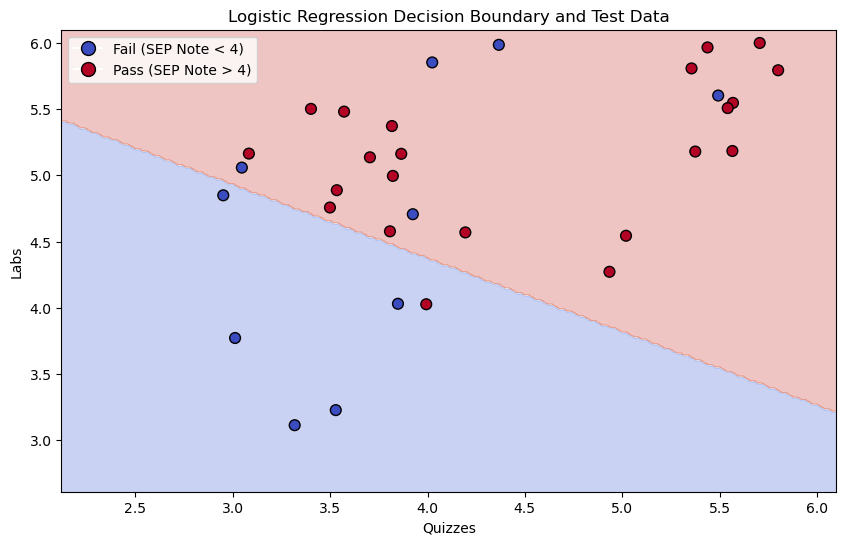

In [57]:
# ------------------------------
# Plotting the Classification Result
# ------------------------------
# plot the decision boundary and the test set

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_class['Quizzes'].min() - 0.1, X_class['Quizzes'].max() + 0.1
y_min, y_max = X_class['Labs'].min() - 0.1, X_class['Labs'].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Use the classifier to predict class labels for each point in the mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 6))
# Plot decision boundary by contour filling
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the test data points on top; color by true class.
scatter = plt.scatter(X_test_cls['Quizzes'], X_test_cls['Labs'], 
                      c=y_test_cls, edgecolor='k', cmap=plt.cm.coolwarm, s=60)
plt.xlabel("Quizzes")
plt.ylabel("Labs")
plt.title("Logistic Regression Decision Boundary and Test Data")
# Create a legend for Pass/Fail labels.
legend_labels = {0: 'Fail (SEP Note < 4)', 1: 'Pass (SEP Note > 4)'}
handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=plt.cm.coolwarm(color/1.0), markersize=10,
                      markeredgecolor='k') for color in [0, 1]]
plt.legend(handles, [legend_labels[i] for i in [0, 1]])
plt.show()

/Users/alisarupenyan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


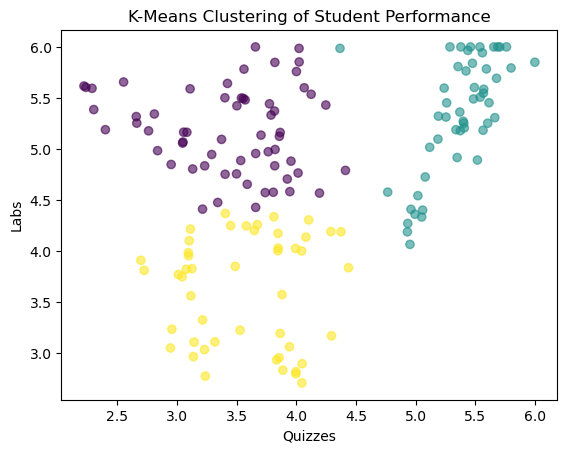

In [58]:
from sklearn.cluster import KMeans

# Use only the semester grades (Quizzes and Labs)
X_cluster = df_aug[['Quizzes', 'Labs']]

# Choose a number of clusters, e.g., 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Add cluster labels to the dataframe
df_aug['Cluster'] = clusters

# Visualize clustering results
plt.scatter(df_aug['Quizzes'], df_aug['Labs'], c=df_aug['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Quizzes")
plt.ylabel("Labs")
plt.title("K-Means Clustering of Student Performance")
plt.show()

SEP Grade Statistics by Cluster:
             mean    median       min       max  count
Cluster                                               
0        4.399044  4.209492  3.214126  5.627477     61
1        5.128553  5.062058  3.724165  6.000000     51
2        3.478970  3.528592  2.718507  4.497546     48

Pass Rates by Cluster:
Cluster
0    0.688525
1    0.960784
2    0.104167
Name: Pass_Rate, dtype: float64


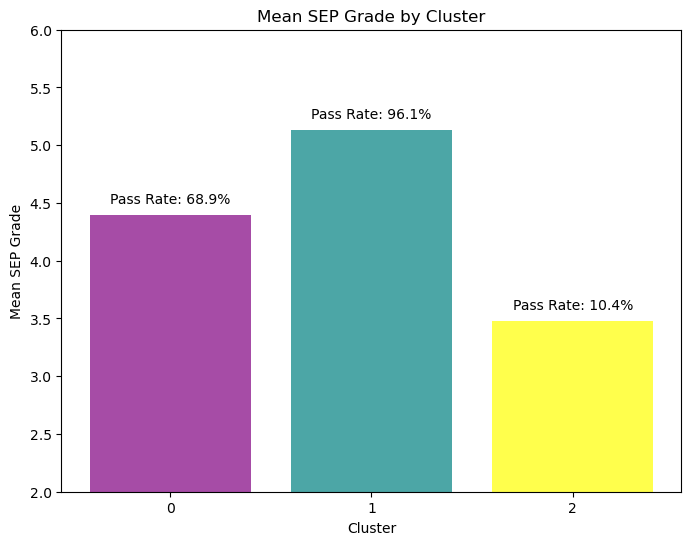

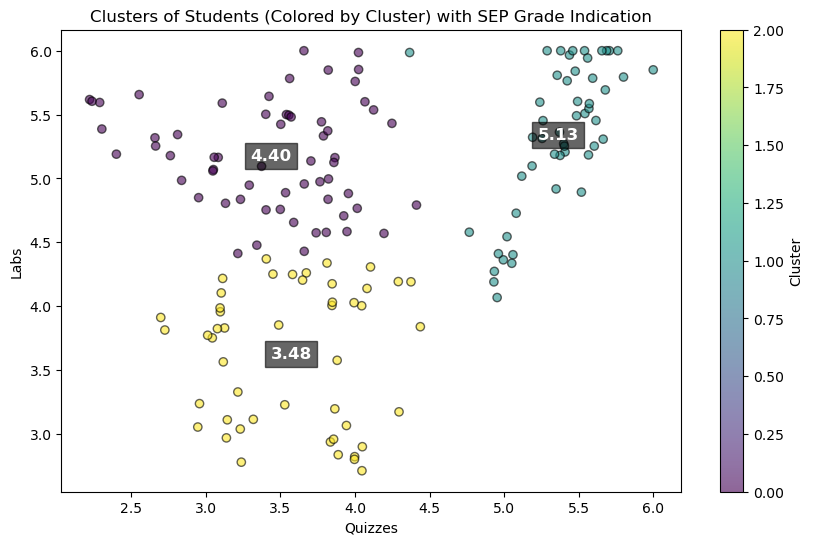

In [65]:
# -----------------------------
# Step 3: Map Clusters to SEP Grades
# -----------------------------
# Compute summary statistics of SEP Final grades for each cluster
cluster_summary = df_aug.groupby('Cluster')['Final'].agg(['mean', 'median', 'min', 'max', 'count'])
print("SEP Grade Statistics by Cluster:")
print(cluster_summary)
df_aug['Pass'] = (df_aug['Final'] > 4).astype(int)  # or use >= if needed
pass_rate = df_aug.groupby('Cluster')['Pass'].mean()
# You can also compute the fraction of students passing (SEP > 4) per cluster:
#pass_rate = df_aug.groupby('Cluster')['Final'].apply(lambda x: np.mean(x >= 4))
pass_rate = pass_rate.rename("Pass_Rate")
print("\nPass Rates by Cluster:")
print(pass_rate)

# -----------------------------
# Step 4: Visualize the Cluster Mapping to SEP Grades
# -----------------------------
plt.figure(figsize=(8, 6))
# Bar plot for the mean SEP grade by cluster
plt.bar(cluster_summary.index.astype(str), cluster_summary['mean'], 
        color=['purple', 'teal', 'yellow'], alpha=0.7)
plt.xlabel("Cluster")
plt.ylabel("Mean SEP Grade")
plt.title("Mean SEP Grade by Cluster")
plt.ylim(2, 6)

# Add text for the pass rate over each bar
for idx, row in cluster_summary.iterrows():
    plt.text(x=idx, y=row['mean'] + 0.1,
             s=f"Pass Rate: {pass_rate.loc[idx]*100:.1f}%", ha='center')

plt.show()

# -----------------------------
# Optional: Scatterplot with Cluster Colors and SEP Grade as a Label
# -----------------------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_aug['Quizzes'], df_aug['Labs'], 
                      c=df_aug['Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel("Quizzes")
plt.ylabel("Labs")
plt.title("Clusters of Students (Colored by Cluster) with SEP Grade Indication")

# Overlay mean SEP grade per cluster at the centroid of each cluster (approx.)
centers = kmeans.cluster_centers_
for i, center in enumerate(centers):
    # Get corresponding SEP grades within that cluster to compute a representative value
    grade_avg = df_aug[df_aug['Cluster'] == i]['Final'].mean()
    plt.text(center[0], center[1], f"{grade_avg:.2f}",
             fontsize=12, fontweight='bold', color='white', ha='center', va='center',
             bbox=dict(facecolor='black', alpha=0.6))

plt.colorbar(scatter, label='Cluster')
plt.show()

In [34]:
np.size(df_aug)

800

In [35]:
import gym
from gym import spaces
import numpy as np

class StudentPerformanceEnv(gym.Env):
    """
    A custom environment to simulate student performance and intervention.
    """
    def __init__(self):
        super(StudentPerformanceEnv, self).__init__()
        # State: [QuizAvg, LabAvg, CurrentStep] - normalized between 0 and 1
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)
        # Actions: 0 = no intervention, 1 = light intervention, 2 = intensive intervention
        self.action_space = spaces.Discrete(3)
        self.max_steps = 10  # simulate 10 time steps in a semester
        self.current_step = 0
        self.state = None

    def reset(self):
        # Random initial performance (normalized from original 2 to 6 -> scale to 0-1)
        quiz = np.random.uniform(2, 6)
        lab = np.random.uniform(2, 6)
        self.current_step = 0
        self.state = np.array([ (quiz-2)/4, (lab-2)/4, 0.0 ])
        return self.state

    def step(self, action):
        self.current_step += 1
        # Decode current performance from state:
        quiz_score = self.state[0] * 4 + 2
        lab_score = self.state[1] * 4 + 2
        
        # Apply intervention effect
        # For demonstration: interventions boost scores by a factor (with diminishing returns)
        if action == 0:
            delta = 0.0
        elif action == 1:
            delta = np.random.uniform(0.1, 0.3)
        else:  # action 2: intensive intervention
            delta = np.random.uniform(0.3, 0.6)
        
        # Update both quiz and lab scores (as a simple simulation)
        quiz_score = min(6, quiz_score + delta)
        lab_score  = min(6, lab_score + delta)
        
        # Update state: update the scores and current step progress
        progress = self.current_step / self.max_steps
        self.state = np.array([ (quiz_score-2)/4, (lab_score-2)/4, progress ])

        # At the final time step, determine final exam grade as a function of performance
        if self.current_step == self.max_steps:
            # A simple formula: weighted average of quiz and lab scores, plus some randomness
            final_grade = (quiz_score + lab_score)/2 + np.random.uniform(-0.2, 0.2)
            final_grade = np.clip(final_grade, 2, 6)
            # Reward: +1 if pass (grade>4) else 0, or use the final grade as reward
            reward = 1 if final_grade > 4 else 0
            done = True
        else:
            reward = 0  # no reward until the semester ends
            done = False

        return self.state, reward, done, {}

    def render(self, mode="human"):
        print(f"Step: {self.current_step}, State: {self.state}")

# Example: running a random policy on the environment
env = StudentPerformanceEnv()
state = env.reset()
total_reward = 0

for _ in range(env.max_steps):
    action = env.action_space.sample()  # Random action
    state, reward, done, info = env.step(action)
    env.render()
    total_reward += reward
    if done:
        break

print("Total Reward:", total_reward)

Step: 1, State: [0.10717201 0.44741237 0.1       ]
Step: 2, State: [0.22211831 0.56235866 0.2       ]
Step: 3, State: [0.22211831 0.56235866 0.3       ]
Step: 4, State: [0.25924183 0.59948219 0.4       ]
Step: 5, State: [0.25924183 0.59948219 0.5       ]
Step: 6, State: [0.29770399 0.63794435 0.6       ]
Step: 7, State: [0.40100031 0.74124066 0.7       ]
Step: 8, State: [0.42700387 0.76724422 0.8       ]
Step: 9, State: [0.5261598  0.86640016 0.9       ]
Step: 10, State: [0.5617322  0.90197256 1.        ]
Total Reward: 1


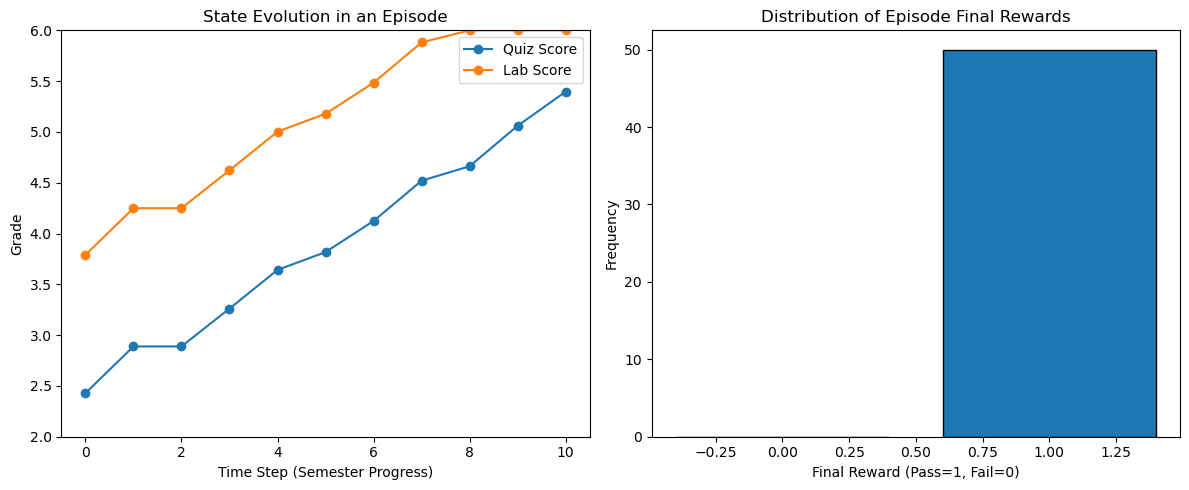

In [44]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Define the Environment
# ---------------------------
class StudentPerformanceEnv(gym.Env):
    """
    A custom environment to simulate student performance and intervention.
    """
    def __init__(self):
        super(StudentPerformanceEnv, self).__init__()
        # State: [QuizNormalized, LabNormalized, Semester Progress]
        # Quiz and Lab scores are normalized from [2,6] to [0, 1]
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)
        # Actions: 0 = no intervention, 1 = light intervention, 2 = intensive intervention
        self.action_space = spaces.Discrete(3)
        self.max_steps = 10  # simulate 10 time steps for a semester
        self.current_step = 0
        self.state = None

    def reset(self):
        # Random initial performance (scores between 2 and 6 normalized to 0-1)
        quiz = np.random.uniform(2, 6)
        lab = np.random.uniform(2, 6)
        self.current_step = 0
        self.state = np.array([ (quiz - 2) / 4, (lab - 2) / 4, 0.0 ])
        return self.state

    def step(self, action):
        self.current_step += 1
        
        # Decode current performance from the normalized state:
        quiz_score = self.state[0] * 4 + 2
        lab_score  = self.state[1] * 4 + 2
        
        # Intervention effect. More aggressive interventions yield a larger boost.
        if action == 0:
            delta = 0.0
        elif action == 1:
            delta = np.random.uniform(0.1, 0.3)
        else:  # action == 2; intensive intervention
            delta = np.random.uniform(0.3, 0.6)
        
        # Update the scores: ensuring that they do not exceed the maximum grade of 6.
        quiz_score = min(6, quiz_score + delta)
        lab_score  = min(6, lab_score + delta)
        
        # Update the semester progress
        progress = self.current_step / self.max_steps
        
        # Update state with normalized quiz and lab scores
        self.state = np.array([ (quiz_score - 2) / 4, (lab_score - 2) / 4, progress ])
        
        # At the final time step, compute a final exam grade influenced by the present performance
        if self.current_step == self.max_steps:
            # A simple rule: final exam grade as the average of current quiz and lab scores plus noise
            final_grade = (quiz_score + lab_score) / 2 + np.random.uniform(-0.2, 0.2)
            final_grade = np.clip(final_grade, 2, 6)
            # Reward: +1 if passing (final_grade > 4), otherwise 0.
            reward = 1 if final_grade > 4 else 0
            done = True
        else:
            reward = 0
            done = False

        return self.state, reward, done, {}

    def render(self, mode="human"):
        print(f"Step: {self.current_step}, State: {self.state}")

# ---------------------------
# Step 2: Run a Few Episodes Using a Random Policy and Collect Data for Visualization
# ---------------------------
env = StudentPerformanceEnv()

num_episodes = 50
episode_rewards = []
all_episode_states = []

for ep in range(num_episodes):
    state = env.reset()
    episode_states = [state.copy()]
    total_reward = 0
    
    for t in range(env.max_steps):
        action = env.action_space.sample()  # Random action
        state, reward, done, _ = env.step(action)
        episode_states.append(state.copy())
        total_reward += reward
        if done:
            break
    episode_rewards.append(total_reward)
    all_episode_states.append(episode_states)

# ---------------------------
# Step 3: Visualization
# ---------------------------
# (a) Plot a trajectory of one episode to show how the state evolves
episode_to_plot = 0  # for example, plot the first episode
states = np.array(all_episode_states[episode_to_plot])
steps = np.arange(states.shape[0])

# Convert normalized quiz and lab scores back to original scale (2,6)
quiz_scores = states[:, 0] * 4 + 2
lab_scores  = states[:, 1] * 4 + 2

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(steps, quiz_scores, marker='o', label='Quiz Score')
plt.plot(steps, lab_scores, marker='o', label='Lab Score')
plt.xlabel("Time Step (Semester Progress)")
plt.ylabel("Grade")
plt.title("State Evolution in an Episode")
plt.ylim(2, 6)
plt.legend()

# (b) Plot the distribution of final rewards over episodes
plt.subplot(1, 2, 2)
plt.hist(episode_rewards, bins=np.arange(-0.5, 2, 1), edgecolor='black', rwidth=0.8)
plt.xlabel("Final Reward (Pass=1, Fail=0)")
plt.ylabel("Frequency")
plt.title("Distribution of Episode Final Rewards")

plt.tight_layout()
plt.show()

We simulate several episodes using (for example) a random policy (i.e. selecting random interventions) and then visualize:
The evolution of the student performance (using normalized quiz and lab scores) over the course of a single episode.
The distribution of final rewards (pass/fail outcomes) over many episodes.
You can imagine that, in a real RL experiment, you would replace the random action selection with an RL algorithm (such as Q-learning, Policy Gradient, or DQN) that learns to intervene more optimally. For demonstration purposes, our code uses a random agent.


Environment Definition:
The custom StudentPerformanceEnv models a student’s progress over a 10-step semester. At each step, the environment updates quiz and lab scores according to an intervention action. At the final step, a final grade is computed, and the episode reward is defined as ( +1 ) if the student’s final grade exceeds 4 (pass) and 0 otherwise.
Episode Simulation:
We simulate 50 episodes using random actions. For every episode, we record the state (which holds the normalized quiz and lab scores as well as semester progress) at each time step, and finally, note the cumulative reward.
Visualization:
In subplot (a), we plot the evolution of scores (converted back from the normalized state) over the time steps for one episode. This shows how interventions (even random ones) affect the simulated performance.
In subplot (b), we plot a histogram showing the distribution of the final rewards across episodes (pass/fail outcomes). This gives an idea of how frequently the random policy leads to a pass.
This demonstration not only provides a visual understanding of the environment’s dynamics but also sets the stage for later implementing and visualizing a learning algorithm that improves on the random policy through reinforcement learning.


The environment in this context is a custom OpenAI Gym simulation designed to mimic a student's performance evolution over a semester in response to different interventions. In other words, instead of using real-world data directly, we construct a simulation (the environment) that models how a student's quiz and lab scores might evolve over time when certain "actions" (i.e., interventions) are taken.
Key Elements of the Environment
State:
The state is a numerical vector representing the current student performance and progress. Specifically, it includes:
Quiz Score (normalized): The current quiz score scaled from the original scale (2 to 6) to a normalized 0–1 range.
Lab Score (normalized): Similarly, the current lab score normalized.
Semester Progress: A number between 0 and 1 indicating how far along in the semester the student is (based on the current time step).
Action Space:
The actions available to an agent (or policy) in this environment are interventions that can affect the student's performance:
Action 0: No intervention.
Action 1: A light intervention (a small boost in performance).
Action 2: An intensive intervention (a larger boost in performance).
Dynamics (Transition Function):
When an action is taken:
The environment updates the quiz and lab scores by adding a small “boost” (the magnitude of which depends on the type of intervention chosen).
The scores are capped at the maximum allowable grade (6).
The semester progresses by one time step.
Episode Termination and Reward:
The environment is set to run for a fixed number of time steps (e.g., 10 steps, representing a semester).
At the final time step, the environment calculates a final exam grade as a function of the current quiz and lab scores (plus some randomness).
The reward is assigned based on the final grade: for instance, if the final exam grade is greater than 4 (pass), the environment might return a reward of +1; otherwise, the reward is 0.
Purpose:
This environment is used to demonstrate and test reinforcement learning (RL) methods. An RL agent interacts with this environment by choosing interventions at each step, and over time, it could learn which sequence of interventions maximizes the student’s chance of passing the final exam.

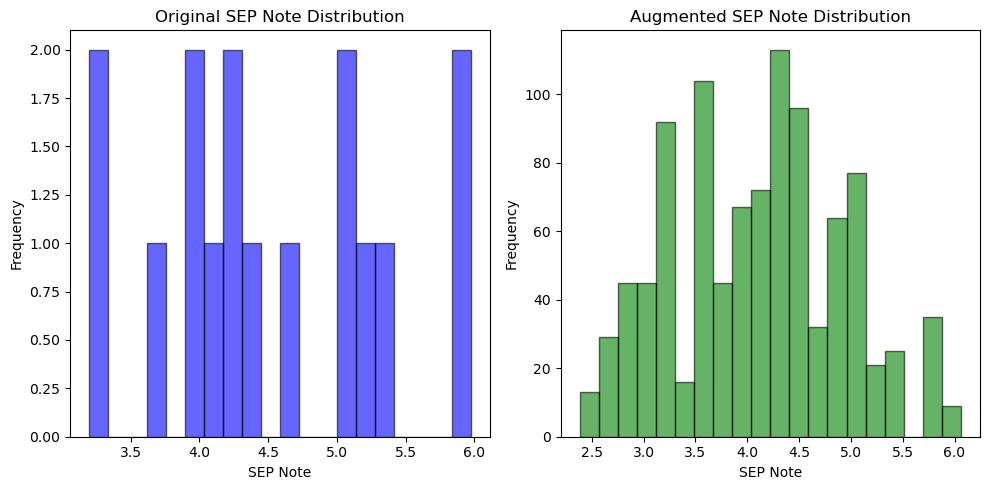

Text(0, 0.5, 'Labs')

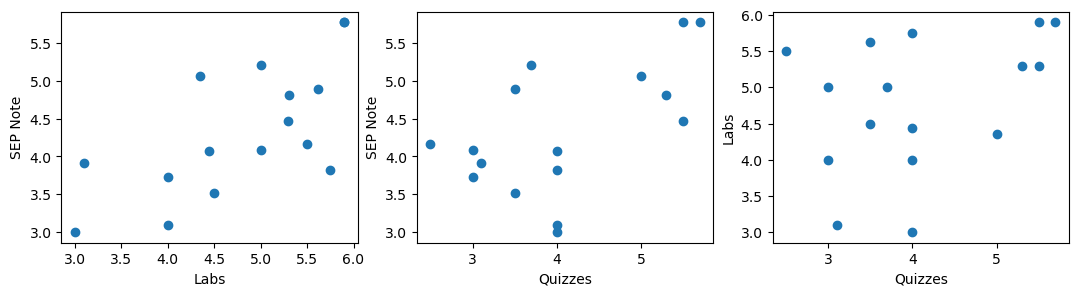